# Steps for Causal Impact

1. Define the Pre and Post Period.

2. Retrieve the data we need.

3. Check whether the variables are correlated in the pre-period.

4. Remove non-correlted data.

5. Use Causal Impact.

# Loading the necessary libraries


- **yfinance** library helps us retrieve financial data from yahoo finance.

- **tfcausalimpact** is Google's Causal Impact Algorithm Implemented on Top of TensorFlow Probability.

- **TensorFlow Probability** is a library for probabilistic reasoning and statistical analysis in TensorFlow.

- **Causal Impact** is an R package for causal inference using Bayesian structural time-series models.

In [ ]:
# Loading the necessary libraries
!pip install yfinance
!pip install tfcausalimpact

In [ ]:
# Import the libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Define Dates
training_start = "2020-09-01" # Had a ratio of 10:1, training is of 40 days and the treatment is of 4 days
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24" # Always add an additional day from treatment_end

# Loading Financial Data

In [ ]:
# Bitcoin Data
y = ["BTC-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,11679.316406,12067.081055,11601.128906,11970.478516,11970.478516,27311555343
2020-09-02,11964.823242,11964.823242,11290.793945,11414.034180,11414.034180,28037405299
2020-09-03,11407.191406,11443.022461,10182.464844,10245.296875,10245.296875,31927261555
2020-09-04,10230.365234,10663.919922,10207.940430,10511.813477,10511.813477,29965130374
2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,44916565292
2020-09-06,10167.216797,10353.927734,10056.885742,10280.351562,10280.351562,37071460174
2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477,10369.563477,33703098409
2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602,10131.516602,33430927462
2020-09-09,10134.151367,10350.542969,10017.250977,10242.347656,10242.347656,24128292755


- Out of all these columns we need **Adj Close** so we will get that by doing.

In [ ]:
y = y['Adj Close']

In [ ]:
y

Date
2020-09-01    11970.478516
2020-09-02    11414.034180
2020-09-03    10245.296875
2020-09-04    10511.813477
2020-09-05    10169.567383
2020-09-06    10280.351562
2020-09-07    10369.563477
2020-09-08    10131.516602
2020-09-09    10242.347656
2020-09-10    10363.138672
2020-09-11    10400.915039
2020-09-12    10442.170898
2020-09-13    10323.755859
2020-09-14    10680.837891
2020-09-15    10796.951172
2020-09-16    10974.905273
2020-09-17    10948.990234
2020-09-18    10944.585938
2020-09-19    11094.346680
2020-09-20    10938.271484
2020-09-21    10462.259766
2020-09-22    10538.459961
2020-09-23    10246.186523
2020-09-24    10760.066406
2020-09-25    10692.716797
2020-09-26    10750.723633
2020-09-27    10775.269531
2020-09-28    10709.652344
2020-09-29    10844.640625
2020-09-30    10784.491211
2020-10-01    10619.452148
2020-10-02    10575.974609
2020-10-03    10549.329102
2020-10-04    10669.583008
2020-10-05    10793.339844
2020-10-06    10604.406250
2020-10-07    10668.968

In [ ]:
type(y)

pandas.core.series.Series

- Rename the data array like this

In [ ]:
y = y.rename("y")
y.tail()

Date
2020-10-19    11742.037109
2020-10-20    11916.334961
2020-10-21    12823.689453
2020-10-22    12965.891602
2020-10-23    12931.539062
Name: y, dtype: float64

- Training Group is nothing but **Control Group**.

- Here the treatment and training group are assumed to have same KPI.

- More the number of training groups precise the analysis would be.

- Try keeping the post-period (treatment duration) to bare minimum.

In [ ]:
# Loading the Stock Data
stocks = ["CARL-B.CO", "ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "DE", "KTOS", "GOOG"]
x = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = '1d')

x.head()

[*********************100%%**********************]  9 of 9 completed


Adj Close                                               \
             CARL-B.CO       CRSP          DE       GOOG         JD   
Date                                                                  
2020-09-01  794.451172  93.419998  209.291962  83.035500  79.267685   
2020-09-02  802.765198  93.930000  208.734344  86.414001  79.959557   
2020-09-03  818.099915  85.690002  202.677399  82.092003  75.952454   
2020-09-04  804.612671  82.019997  203.186935  79.552002  76.874954   
2020-09-07  812.926697        NaN         NaN        NaN        NaN   

                                                              Close  ...  \
                 KTOS          SQ       TRMB     ZAL.DE   CARL-B.CO  ...   
Date                                                                 ...   
2020-09-01  19.700001  166.660004  53.410000  77.000000  860.000000  ...   
2020-09-02  19.910000  162.880005  54.310001  77.000000  869.000000  ...   
2020-09-03  19.520000  152.860001  50.900002  75.080002  885.599976  ...   
2020-09-04  19.260000  146.389999  49.959999  71.739998  871.000000  ...   
2020-09-07        NaN         NaN        NaN  74.000000  880.000000  ...   

                 Open    Volume                                                \
               ZAL.DE CARL-B.CO       CRSP         DE        GOOG          JD   
Date                                                                            
2020-09-01  74.959999    269532   779500.0  1873400.0  36506000.0  11431400.0   
2020-09-02  77.500000    202539   532000.0  1983000.0  50224000.0  13860900.0   
2020-09-03  77.260002    248867  1278900.0  1975200.0  62156000.0  19254000.0   
2020-09-04  74.800003    221091  1570300.0  1662300.0  52172000.0  21500900.0   
2020-09-07  72.239998     90498        NaN        NaN         NaN         NaN   

                                                      
                 KTOS          SQ       TRMB  ZAL.DE  
Date                                                  
2020-09-01   587600.0  12306400.0   542300.0  790198  
2020-09-02   612800.0  11214800.0   728800.0  496554  
2020-09-03   847100.0  16421200.0  1220300.0  736259  
2020-09-04  1060000.0  17995200.0   914700.0  662250  
2020-09-07        NaN         NaN        NaN  362062  

[5 rows x 54 columns]

In [ ]:
# Getting just the required data
x = x.iloc[:,:len(stocks)]
x.head(1)

Adj Close                                                        \
             CARL-B.CO       CRSP          DE     GOOG         JD       KTOS   
Date                                                                           
2020-09-01  794.451172  93.419998  209.291962  83.0355  79.267685  19.700001   

                                      
                    SQ   TRMB ZAL.DE  
Date                                  
2020-09-01  166.660004  53.41   77.0

In [ ]:
x.columns = x.columns.droplevel()
x.head()

,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,794.451172,93.419998,209.291962,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,802.765198,93.930000,208.734344,86.414001,79.959557,19.910000,162.880005,54.310001,77.000000
2020-09-03,818.099915,85.690002,202.677399,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,804.612671,82.019997,203.186935,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,812.926697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [ ]:
# Combine all the data
df = pd.concat([y, x], axis=1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,794.451172,93.419998,209.291962,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,802.765198,93.930000,208.734344,86.414001,79.959557,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,818.099915,85.690002,202.677399,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,804.612671,82.019997,203.186935,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,799.439575,81.459999,202.129379,76.619499,73.242615,19.230000,139.110001,49.139999,73.440002


# Data Analysis

- We just sorted the data before a certain date and then put it into another dataframe to do further analysis.

In [ ]:
# Prepare dataframe with only training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-13,11425.899414,827.891968,103.059998,228.852371,78.584000,79.383003,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,822.718811,101.370003,230.058289,78.403999,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,808.492615,99.889999,229.836411,77.956497,77.115189,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,801.656555,109.830002,231.592148,78.650497,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,804.427917,107.720001,229.768860,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000


- To do correlation for time-series the data must be stationery because if it is dynamic there is always a random chance that the data may correlate.

- To check whether the data is stationery we must do Dicky-Fuller's test. if the p value is less than 0.05 then the data is stationery.

- If the data is not stationery usually in 95% of the cases we do differencing to make the data stationery.

In [ ]:
# Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)
print(test)

(-2.5728149494309167, 0.0987470320882271, 0, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 319.65605165053677)


- Many parameters were returned so we just want the p-value and it is at index 1 so to just print that we can do it by:

In [ ]:
test = adfuller(x = df_training.y)[1]
print(test)

0.0987470320882271


In [ ]:
if test < 0.05:
  print("The time series is stationery")
else:
  print("The time series is dynamic")

The time series is dynamic


- With the help of **.pct_change()**, we need to determine the consecutive change between variables in terms of percentage.

In [ ]:
# Differencing
differencing =  df_training.pct_change().dropna()
differencing.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-02,-0.046485,0.010465,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,0.019102,-0.087725,-0.029017,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,-0.016486,-0.042829,0.002514,-0.030941,0.012146,-0.013320,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.006429,-0.006828,-0.005205,-0.036863,-0.047250,-0.001558,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,-0.003929,0.046526,0.025114,0.016034,0.012726,0.016641,0.036662,0.019740,-0.009804


- Now we need to check whether the data is stationery or not

In [ ]:
test = adfuller(x = differencing.y)[1]
print(test)

if test < 0.05:
  print("The time series is stationery")
else:
  print("The time series is dynamic")

3.8054323617260893e-07
The time series is stationery


- Now that the data is stationery we need to a correlation matrix to find the correlation.

<Axes: >

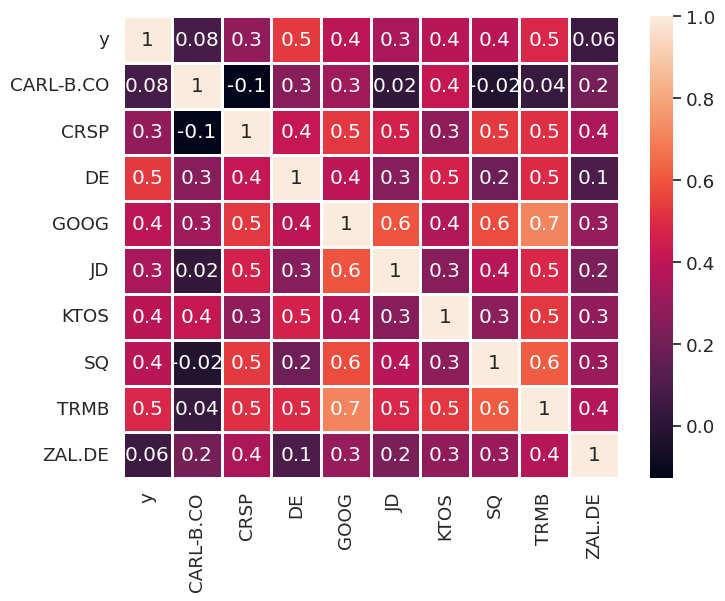

In [ ]:
# Correlation Matrix
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            linewidth = 1,
            linecolor = 'white')

# Google Causal Impact

In [ ]:
# Prepare the Dataset
df_final = df.drop(columns = ['CARL-B.CO', 'ZAL.DE'])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,209.291962,83.0355,79.267685,19.700001,166.660004,53.41


In [ ]:
# Prepare pre and post period
pre_period = [training_start, training_end]
pre_period

['2020-09-01', '2020-10-19']

In [ ]:
post_period = [treatment_start, treatment_end]
post_period

['2020-10-20', '2020-10-23']

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


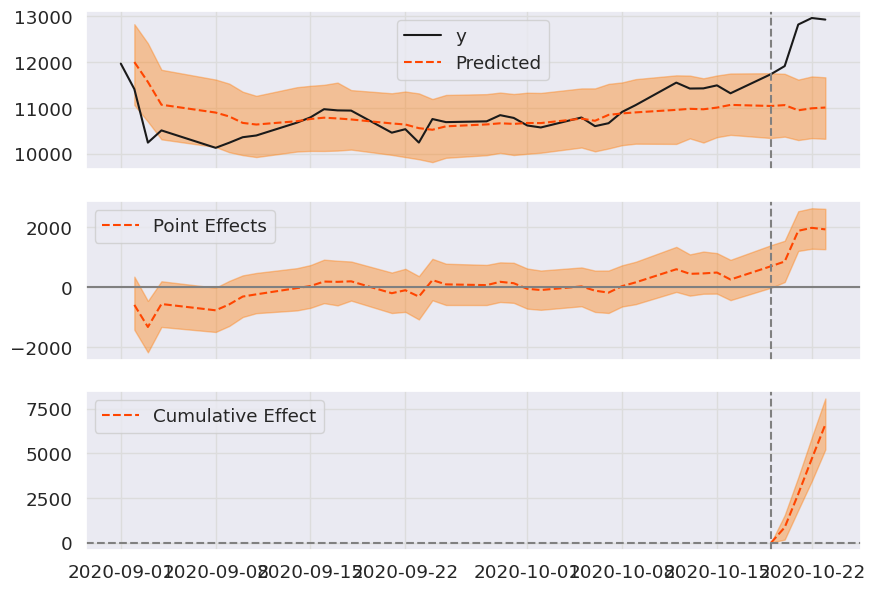

In [ ]:
# Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [ ]:
# Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11005.2 (190.8)    44020.8 (763.21)
95% CI                    [10637.92, 11385.86][42551.67, 45543.42]

Absolute effect (s.d.)    1654.16 (190.8)    6616.65 (763.21)
95% CI                    [1273.51, 2021.45] [5094.03, 8085.78]

Relative effect (s.d.)    15.03% (1.73%)     15.03% (1.73%)
95% CI                    [11.57%, 18.37%]   [11.57%, 18.37%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11005.2.
The 95% interval of this counterfactual prediction is [10637.92, 11385.86].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1654.16 with a 95% interval of
[1273.51, 2021.45]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44020.8. The 95% interval of this prediction is [42551.67, 45543.42].


The above results are given in terms of absolute numbers. In relative
te